# <font color='#BFD72F'>Project 3 - Clustering Group J</font> # 
## Hotel customer segmentation



This project is result of group work for university project, therefore the following is a different version by the repo author.

## Dataset description

Please check the following URL for information about the dataset structure and content: https://www.sciencedirect.com/science/article/pii/S2352340920314645

## Work description

#### Introduction
<p>Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing. Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.</p>

#### Customer segmentation in hotel H
<p>Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one only customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.</p>
<p>Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers.</p>

#### The challenge
<p>Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database.</p>

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [0 - Executive Summary](#summary)
    * [0.1 - Approach summary](#approach)
    * [0.2 - Clustering results](#results)
* [1 - Data Import & exploration](#imp_exp)
    * [1.1 - Imports](#imp)
    * [1.2 - Exploration + Visuals](#exp)
    * [1.3 - Correlations](#corr)
* [2 - Data Prepartion](#prep)
    * [2.1 - Transformations](#transformation)
    * [2.2 - Outliers](#outliers)
* [3 - Feature selection + engineering](#features)
* [4 - Models + evaluations](#models)

# <font color='#BFD72F'>0 - Executive Summary</font> <a class="anchor" id="summary"></a>

## <font color='#BFD72F'>0.1 - Approach summary</font> <a class="anchor" id="approach"></a>

During this project we will pass through the entire process from understanding to the modeling. As the final target is to create clusters to differentiate the customer base, we analyzed the data trying to understand the demographic and purchase behaviours that could indicate solid patterns and to create groups among them. For the modeling we assessed the features to feed the model wil PCA analysis and ran 2 clusters with and without the PCA result. Is important to mention that the it was identified a high numer of customers with 0 revenues, that although it has no signicant info on the purchase level, we decided to keep them for a better profiling.

## <font color='#BFD72F'>0.2 - Clustering results</font> <a class="anchor" id="results"></a>


After running the clustering with and without PCA, we have some technical and business related thoughts and recommendatons. 

* About the clustering, we saw a lot of similarities among groups, especially on the expense level and room per night, so we would recommend enriching the dataset further with other factors that can be relevant for the analysis and distinguish the customer further. For example if some disocunt has been used, or the period of booking, weekend or week booking, and to compare to revenues, estimate costs of acquisition of the customers. 
* We would also suggest reviewing the dataset to assess the reason of the 25% of dataset without any revenues, which according to the DaysSinceCreation whould have been in the room.
* Regarding the Data mining crtiteria of the clustering, these have not been discussed not set. Regardless, the Silhouette score on around 30-35% could be definitely improved, but we still think this is a good starting point for clustering results analysis, and as clustering took into consideration several attributes, the outcome is a complete profile of the customers.

Regarding the Marketing related advises, we notice that the profiles are mostly diffent due to channel of booking, region of travel (origin), decision upon king size and Twin bed and slightly in terms of Nights of stay. 

We would suggest to tackle the clusters as follows:

* Cluster 1, 2, 3 (both methods PCA and non PCA)
  * Provide the main profile to Agency which is the main channel, in order to faciliate the acquisition
  * Promote business via rank page on Travel operator websites in the given countries
  * Redesign the website, so it is based on compelling images with clear marketing messages around comfort during the stay (such as king size beds). This comes from the assumption that many people check hotel's website before booking via operator 
  * focus the effort only on the TOP 5 EU countries
  * exploit usage of Metasearchers and Social Campaigns on facebook and INstagram (due to the relatively high age) in order to attract potential users, 
  * Suggest immediately the "king Size bed rooms" also in the pictures carousel or promotion , so that during the customer journey of selection, it's possible to trigger the interest
  * In order to push the stay, which usually is around 1.5 days, propose time-limited discounts for at least 2 nights. Assuming these are short vacations, possibly between Friday and Sunday , or until Monday, to increase the turnover rate of the Rooms

For the remaining Clusters , as the customer come from further, and they might stay only a limited time as part of tours, look for Search campaigns on google related to people who visited the Airline websites, from specific destionation, possibly capturing interested demand. 
Regarding the Age and spend attituted, they are very similar to the other clusters, so similar disocunt options can be approahc, but using different channels. 

# <font color='#BFD72F'>1 - Data Import & exploration</font> <a class="anchor" id="imp_exp"></a>

## <font color='#BFD72F'>1.1 - Imports</font> <a class="anchor" id="imp"></a>

In [ ]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#Libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

#Visuals
import seaborn as sns
from matplotlib import pyplot as plt
from ipywidgets import interact, interact_manual
import plotly.express as px
import plotly.graph_objs as go

from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance



In [ ]:
!pip install joypy

In [ ]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Loading the dataset and visualizing top rows
ds = pd.read_csv('HotelCustomersDataset.tsv', sep="\t")
ds['ID'] = ds['ID'].astype(str)
ds.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  object 
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

## <font color='#BFD72F'>1.2 - Exploration</font> <a class="anchor" id="exp"></a>

In [ ]:
#Summary statistics
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,83590,83590,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,83590,188,FRA,12422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,79811.0,NaN,NaN,NaN,45.398028,16.572368,-11.0,34.0,46.0,57.0,122.0
DaysSinceCreation,83590.0,NaN,NaN,NaN,453.640902,313.390291,0.0,177.0,397.0,723.0,1095.0
NameHash,83590,80642,0xD1490806AB49549565586CE26419163D5EFDD3C607B9...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,83590,76993,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,83590.0,NaN,NaN,NaN,66.196028,87.75899,-1.0,0.0,29.0,103.0,588.0
LodgingRevenue,83590.0,NaN,NaN,NaN,298.802087,372.851892,0.0,59.0,234.0,402.0,21781.0
OtherRevenue,83590.0,NaN,NaN,NaN,67.589132,114.327776,0.0,2.0,38.5,87.675,7730.25
BookingsCanceled,83590.0,NaN,NaN,NaN,0.002022,0.06677,0.0,0.0,0.0,0.0,9.0


#### Main findings:
- Dataset contains 30 variables: demographics, id related and hotel characteristics&preferences behavior when making a booking
- The most frequent nationality is french with 12.422 customers
- Customers have a average age of 45 years
- In average the amount of days passed since the customer was created are 453 days
- Namehash and DocID hash have duplicated values. This should be explored in order to understand whether they correspond to the same customer making different reservations and should be aggregated, or they correspond to different customers
- In average, customers book their accomodation 2 months in advanced (66 days)
- Customers in average spend around 300 euros in lodging expenses and 68 in other expenses when they stay.
- Most of the customers don't cancel in advanced and show up after they made a reservation
- The average rate of successful reservation - check in is 0,8. So, in average people stayed one time in the hotel. The most frequent customer according to the dataset, did it 66 times.
- In average the multiplication of the number of staying nights by the sum of people that stayed (adults and children) is 4,6
- In average, the multiplication of the number of rooms of each booking by the number of nights is 2.35
- Considering the last 2 variables explained, we could propose a ratio that allows us to calculate people per room, in order to get insights of the most popular type of room for this accomodation.
- Most of customers stayed for the first type in this hotel more than one year ago, and the last time they have been at the hotel has been around the same amount of time. We could infere that possibly they only stayed one time in this accomodation.
- The most common way of booking is made through a travel agent
- Most common market segment in which the customers are classified is others.
- In terms of floor customer preferences when booking the hotel, only 4% declared to have a preference about having a high floor room. Preferences about other types of floors are mostly not requested.
- In average, customers don't request a accessible room when booking
- Showing preferences about shower, bathtub or a crib are also not common when booking
- Bed type (king size, twin bed) seems to be a relevant attribute when booking
- The closeness to the elevator and the absence of alcohol in the mini bar don't seem to be relevant variables when making bookings
- About 8% of the bookings show a preference related to a "quiet room" while making a booking.
- Age, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCheckedIn, PersonsNights, RoomNights seem to have outliers
- Age is the only variable with missing values

### Categorical Variables 

In [ ]:
# Understand variables DistributionChannel and MarketSegment in more detail
ds['DistributionChannel'].value_counts(normalize=True)

Travel Agent/Operator      0.820301
Direct                     0.142505
Corporate                  0.031104
Electronic Distribution    0.006089
Name: DistributionChannel, dtype: float64

- As mentioned before, travel agent/operator is the most common distribution channel, followed by people who makes their reservations directly.
- Corporate and Electronic Distribution

In [ ]:
ds['MarketSegment'].value_counts(normalize=True)

Other                    0.574698
Travel Agent/Operator    0.139610
Direct                   0.137062
Groups                   0.113662
Corporate                0.025948
Complementary            0.006101
Aviation                 0.002919
Name: MarketSegment, dtype: float64

In [ ]:
import plotly.io as pio
pio.renderers.default = 'iframe'
!jupyter labextension install jupyterlab-plotly!

An error occurred.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /var/folders/1_/1lg744fj0fz3m792q5hch1kc0000gn/T/jupyterlab-debug-gwanwm_d.log


In [ ]:
# Plot count of ID by Distribution Channel and Market Segment to see if we find any relevant patterns
fig = px.histogram(ds, x="MarketSegment", y="ID", 
                     barmode="group", facet_col="DistributionChannel", histfunc= 'count')

fig.update_layout(
    height=400,
    title_text='Count of observations by MarketSegment vs Distribution Channel'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

- People that make a booking through a travel agent are mostly classified in "others" in terms of market segment
- Some observations seem to be misleading. For instance, if a reservation was booked through a travel agent it shouldn't be classified as "segment market" direct

In [ ]:
#Understand variable nationality
ds['Nationality'].value_counts(normalize=True).head(10)

FRA    0.148606
PRT    0.138737
DEU    0.122407
GBR    0.103553
ESP    0.058643
USA    0.041022
ITA    0.040256
BEL    0.037313
BRA    0.034717
NLD    0.032600
Name: Nationality, dtype: float64

- 50% of the customers come either from: France, Portugal, Germany or Great Britain.
- Due to high Cardinality it will be necessary to treat this feature. Potential options are: Domestic(PT) and Foreign(non-PT) or Frequent (top 5 rank) and Less Frequent (others).

In [ ]:
#Analyze the most frequent DocIDHash to understand whether is the same customer everytime or not
#First, check value counts for DocIDHash to detect how many frequent cases do we have
ds['DocIDHash'].value_counts(normalize=True).head(10)


0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA    0.043749
0xFDBABC6688FD5F6B0E1CB119E1676C228066AC1545D0B4DA3B3C8B10B3091210    0.000299
0x154DDC115DF524006203F0A7F59DE028542EC307149BF7F20E37B9D4502B89BD    0.000215
0x101976BA2149F74CDA4CF21A2C01494D789D58168A6FEE8E9EA921C369504064    0.000156
0x52911ACD341A0489025445B361A0EBF49CDC76B2D3DBC0CF6CDBF2F5DD1F5C22    0.000144
0xE8675E9652E9AA6C2467707A81CA012A73AF7156A3E8D9CA22664A7DE75C588F    0.000144
0x2907579A969DD1DD4BE224AB6B7D0F709AE9A38FBE696E9F74EDAF0EAB52D073    0.000132
0x3C395FF01D917F9E91CBB98F1C29E7F77AE795141A7D193B6B901C6B7EFDCD4C    0.000120
0x075E7AF0463C2AE314CD3A5E3147AC11CD4E7A36BC62E423F9C36C33D292EC01    0.000120
0x632A5F8E91E5E52BD383FA6592E1A7245D499BF711C523FC4061DCDD31CFBE1C    0.000108
Name: DocIDHash, dtype: float64

- There is one DocIDHash that is repeated in 4,3% of the observations. 
- It could even be that one of the most frequent travel agents uses its data as DocID to make the reservations.

In [ ]:
# Let's take a closer look on the repeated DocIDHash. It seems to have 3.657 observations with same DocIDHash, which should not exist.
ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']['NameHash'].count()
ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']['DistributionChannel'].value_counts()


Travel Agent/Operator      2817
Direct                      573
Corporate                   252
Electronic Distribution      15
Name: DistributionChannel, dtype: int64

In [ ]:

ds[ds['DocIDHash']=='0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA'].sort_values('Age',ascending=False).head(158)


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
8947,8948,PRT,82.0,918,0x88D55F760108E2CE1F2C2A1A11EFAA0A24E9CA7006D4...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,265,126.0,108.0,0,...,0,0,0,0,0,1,0,0,0,0
64669,64670,PRT,73.0,163,0x16B74692319351E0A1F937669071AC5C1849FAE2B857...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,144,278.1,44.4,0,...,0,0,0,0,0,0,0,0,0,0
5542,5543,PRT,73.0,974,0x64F26159255CA600B12981C280C74EFBDD3BE1F04FB0...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,142,106.0,28.0,0,...,0,0,0,0,1,0,0,0,0,0
65495,65496,PRT,71.0,157,0x05FFBABACEDCA003198B0BAF596544FA2D4EA2FBD9CA...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,195,1719.0,582.0,0,...,0,0,0,0,0,0,0,0,0,0
63884,63885,PRT,70.0,169,0xA2761D8926D6529B62436551430F2A8A13A2C0F456FF...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,68770,PRT,6.0,132,0xF6B5613C776CD93525D99CA8FB69A853E2AA72AF40CD...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
68838,68839,PRT,4.0,132,0xF1AB43A2B88AE7F0AB3E15715E47F9BC23FD804C6B28...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
67273,67274,PRT,2.0,143,0x2B3A839A8E1747085D6A8B8F959E8E59557561DBDB33...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
44760,44761,PRT,1.0,335,0x2A449F53F8F428097C933D9FDB4B8354AEC0DB61906A...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,1,1,0,0,0,0,0


From the 3657 observations of the repetead DocIDHash, only 157 has input for Age, lefting 3500 with null values. This all corroborates that this feature is not in a good shape to the dataset, therefore we will drop it.

### Numerical Variables 

In [ ]:
#Select numerical variables, leaving the binaries for later
numerical = ds[['DaysSinceCreation','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']]

In [ ]:
# Focus on the revenue = 0

# to what features they correspond to : Market segment ecc
# In what condition are they happeining? only cnacelled?

In [ ]:
check = ds[['DaysSinceCreation', 'DistributionChannel', 'LodgingRevenue', 'DaysSinceLastStay']]
check['binary'] = check['LodgingRevenue'].apply(lambda x : '0' if x == 0 else '1')

px.histogram(check, x = 'DaysSinceCreation', facet_col = 'DistributionChannel' , color = 'binary')

/var/folders/1_/1lg744fj0fz3m792q5hch1kc0000gn/T/ipykernel_2961/1815387929.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.histogram(ds.loc[ds.LodgingRevenue < 50], x = 'LodgingRevenue')

In [ ]:
zero_rev = ds.loc[ds.LodgingRevenue == 0]


In [ ]:
zero_rev.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,20408,20408,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,20408,147,FRA,3057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,19431.0,NaN,NaN,NaN,39.509958,19.632375,-7.0,25.0,41.0,55.0,122.0
DaysSinceCreation,20408.0,NaN,NaN,NaN,227.675813,226.324519,0.0,107.0,177.0,266.0,1095.0
NameHash,20408,19948,0xD1490806AB49549565586CE26419163D5EFDD3C607B9...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,20408,19059,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,20408.0,NaN,NaN,NaN,1.046746,16.071189,0.0,0.0,0.0,0.0,588.0
LodgingRevenue,20408.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OtherRevenue,20408.0,NaN,NaN,NaN,0.893267,43.534632,0.0,0.0,0.0,0.0,5105.5
BookingsCanceled,20408.0,NaN,NaN,NaN,0.000784,0.031296,0.0,0.0,0.0,0.0,2.0


In [ ]:
zero_rev.DocIDHash.nunique()
#zero_rev.to_csv('zero_revenues.csv')

19059

In [ ]:
# check the age
# take the ids that have booking with age < 18. Legally these cannot be customers. though we should consider that these bookings are for families 

DOC_minors = list(ds.loc[ds.Age < 18 ]['DocIDHash'].unique())

families = ds.loc[ds.DocIDHash.isin(DOC_minors)]

In [ ]:
families.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8071,8071,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,8071,89,PRT,3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4571.0,NaN,NaN,NaN,11.641873,7.924269,-11.0,7.0,11.0,15.0,82.0
DaysSinceCreation,8071.0,NaN,NaN,NaN,412.299963,332.122925,0.0,149.0,274.0,703.0,1095.0
NameHash,8071,7645,0xD1490806AB49549565586CE26419163D5EFDD3C607B9...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,8071,4301,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,8071.0,NaN,NaN,NaN,36.833106,72.340512,-1.0,0.0,0.0,41.0,588.0
LodgingRevenue,8071.0,NaN,NaN,NaN,176.946139,346.58388,0.0,0.0,0.0,229.065,4255.0
OtherRevenue,8071.0,NaN,NaN,NaN,43.756769,123.249647,0.0,0.0,0.0,42.5,5105.5
BookingsCanceled,8071.0,NaN,NaN,NaN,0.001982,0.047186,0.0,0.0,0.0,0.0,2.0


In [ ]:
families['DocIDHash'].value_counts()

0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA    3657
0x8879C4527775A85E169974503DD9513631391B28B6754235BA587FB67AC2EA45       4
0x923C57FB39018E7DE02FA8C76159D7AA6858A6E8C8440E3AD432C2CEDEAB2A36       3
0x76563A1515F6638495B323DB3BB58446917621070019E5AFA3D6890A4C20C281       3
0xF236FA7F138F611120C3A5E046ACBE09636B8B37AB1A4E835BE0AC5C113F63FE       3
                                                                      ... 
0x16365E1321A8B6EA2128AF1E257E4FB93B462B15ECA66C4FBBC81D59A96A5DAE       1
0xC1008210998E07BFA41E066AFB143E8AE84CAE403D44CDC60A15D567476E8675       1
0x79EA7E11C3E61D5A57EFD1A94FC85B27D6CFC0BB8D044EBB3E6F751D94024D43       1
0xEFA37906CF53962A4E68356264926C2D2589D3C76A23D43A3242571C8AE8C193       1
0x0E0612BCF1C120B841DD02B9C27DF50B332815EDBB6DE8777D440C026D87B34E       1
Name: DocIDHash, Length: 4301, dtype: int64

In [ ]:
families.loc[families.DocIDHash == '0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C268E6548699E78E587AAEA']

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
38,39,PRT,NaN,1095,0xE515BD10FF3685857D83471A2B6D909E2AC808BA9F51...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
39,40,PRT,NaN,1095,0x92DFD23386EF6E6A50D04DDEEC39F189FA1EC249C4AF...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
55,56,PRT,NaN,1095,0xF23F79BAF6CC4C9A223180F198023D551CCBADEA5942...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,97,213.52,11.5,0,...,0,0,0,0,0,0,0,0,0,0
58,59,PRT,NaN,1095,0x450E3BAA066350133B34FF04CDF3E5228B9F9C95EF94...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,2.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83020,83021,PRT,NaN,4,0xE37F9CFECB3A4E897D6AD75C3DD8B61A5EE31A128408...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83021,83022,PRT,55.0,4,0x39FCA5CB17E53F374C07E1BF70B40C6A730A7AAC3620...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,2,388.00,56.0,0,...,0,0,0,0,0,0,0,0,0,0
83331,83332,PRT,NaN,2,0xBEC92E6F988884F2D45AEFA16ECD1553C009AF086E17...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83383,83384,PRT,NaN,1,0x0B54608923F18D30A2E15593A1E06360397BFFB94AAD...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.00,0.0,0,...,0,0,0,0,0,1,0,0,0,0


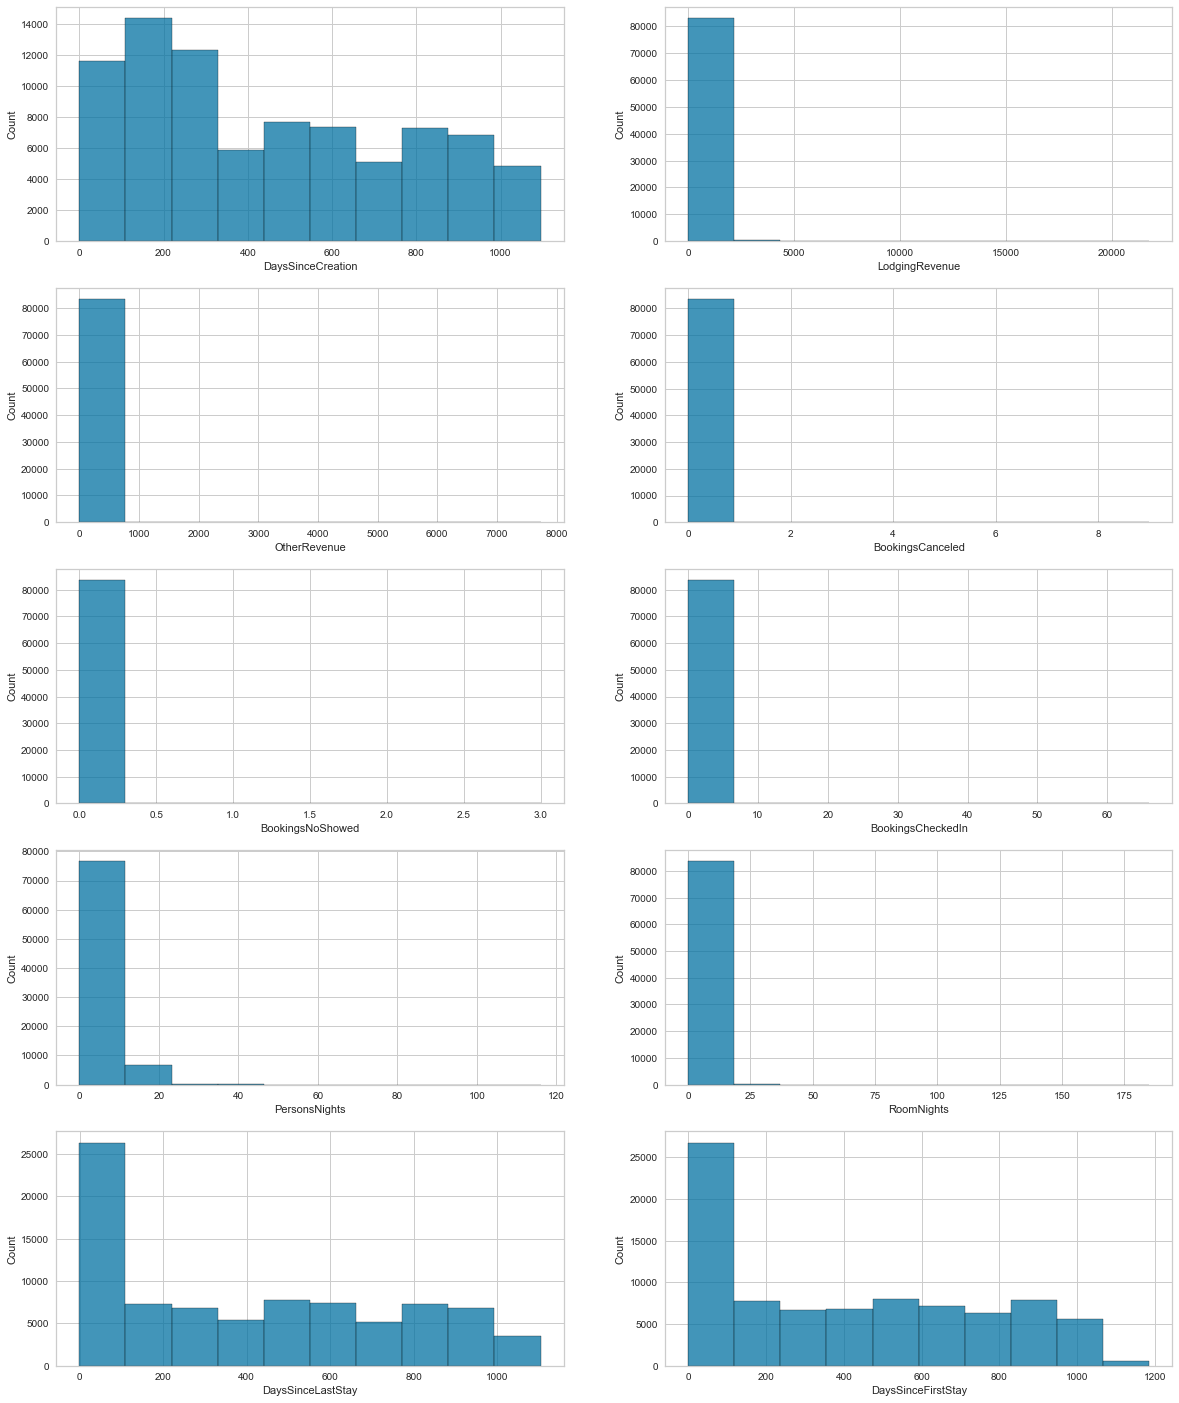

In [ ]:
# visuals of the distribution of the numerical variables
fig, ax = plt.subplots(5,2 , figsize=(20,25))
for var, subplot in zip(numerical, ax.flatten()):
    g = sns.histplot(data=ds,
                    bins=10,
                    x=var,
                    ax=subplot,
                    kde=False)

- Lodging revenue, Other revenue, Bookings canceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights have outliers and should be removed, since it only corresponds to a few number of observations

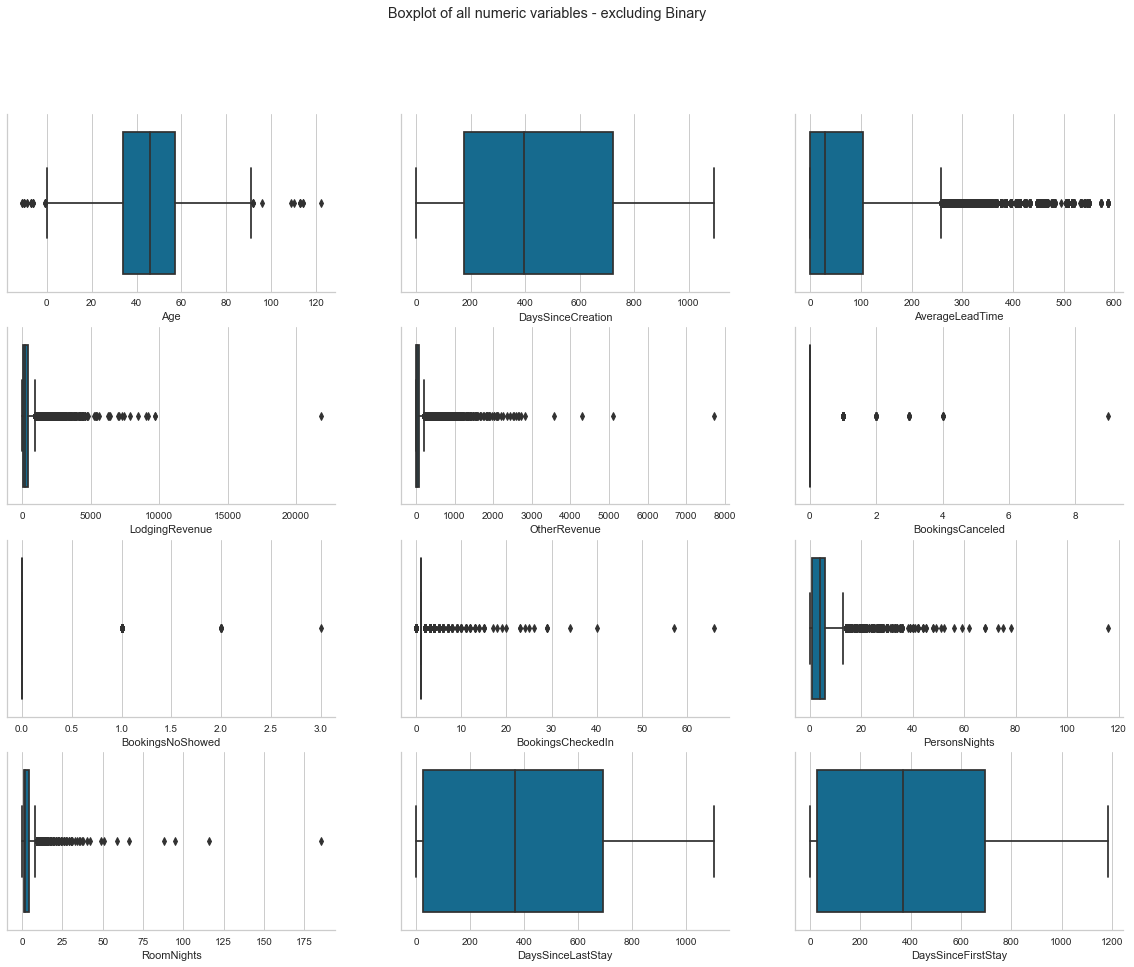

In [ ]:
# HISTOGRAM (ALL NUMERIC VARIABLES - excluding binary)

cols=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed',
     'BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']

# Draw
fig, ax = plt.subplots(4, 3, figsize=(20,15))
for var, subplot in zip(ds[cols], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplot of all numeric variables - excluding Binary");

#### Outliers in numerical (non-binary) attributes
- Age: has observations below 0 and above 100 years.  Values below 0 are not possible so we need to drop it. Value above 100, althought possible, can harm the model, we should also drop it.
- AverageLeadTime: has observations far above the last quartile. Its unlike that someone book a hotel above 1 year in advance, so we should drop this observations.
- LodgingRevenue, OtherRevenue, RoomNights, BookingsCheckedIn and PersonsNights has outliers that are possible to exist, however to the best quality of the clustering, we will drop it.

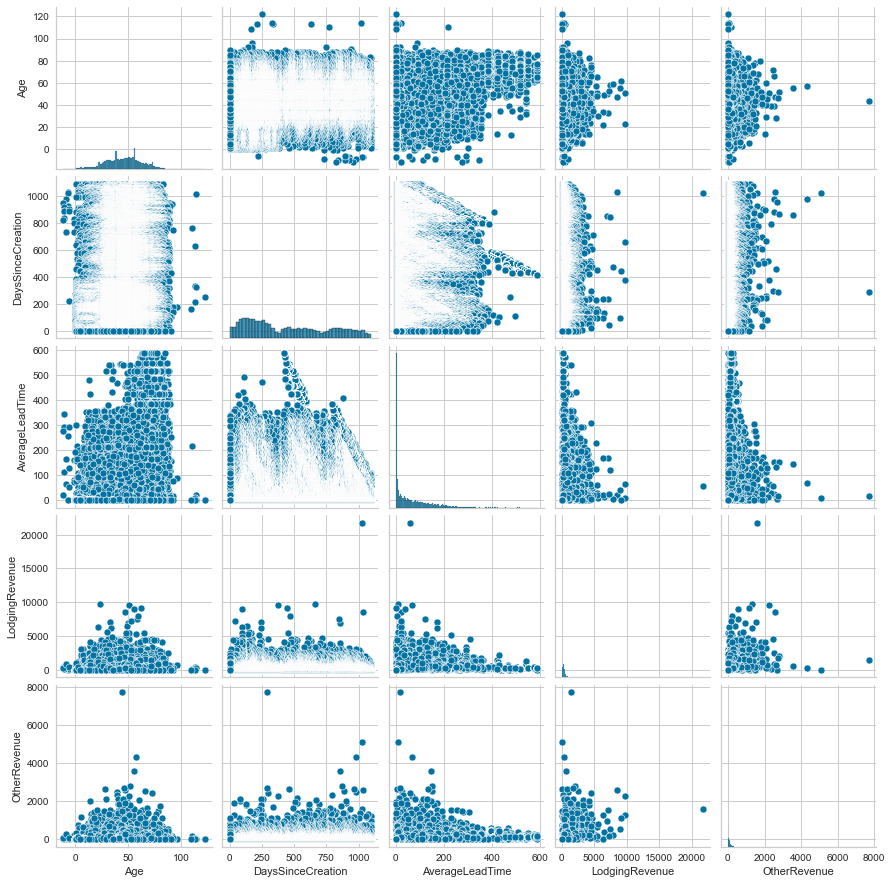

In [ ]:
#Let's check some correlations between some variables related to demographic and spent behavior
cols=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue']
g = sns.pairplot(ds[cols])

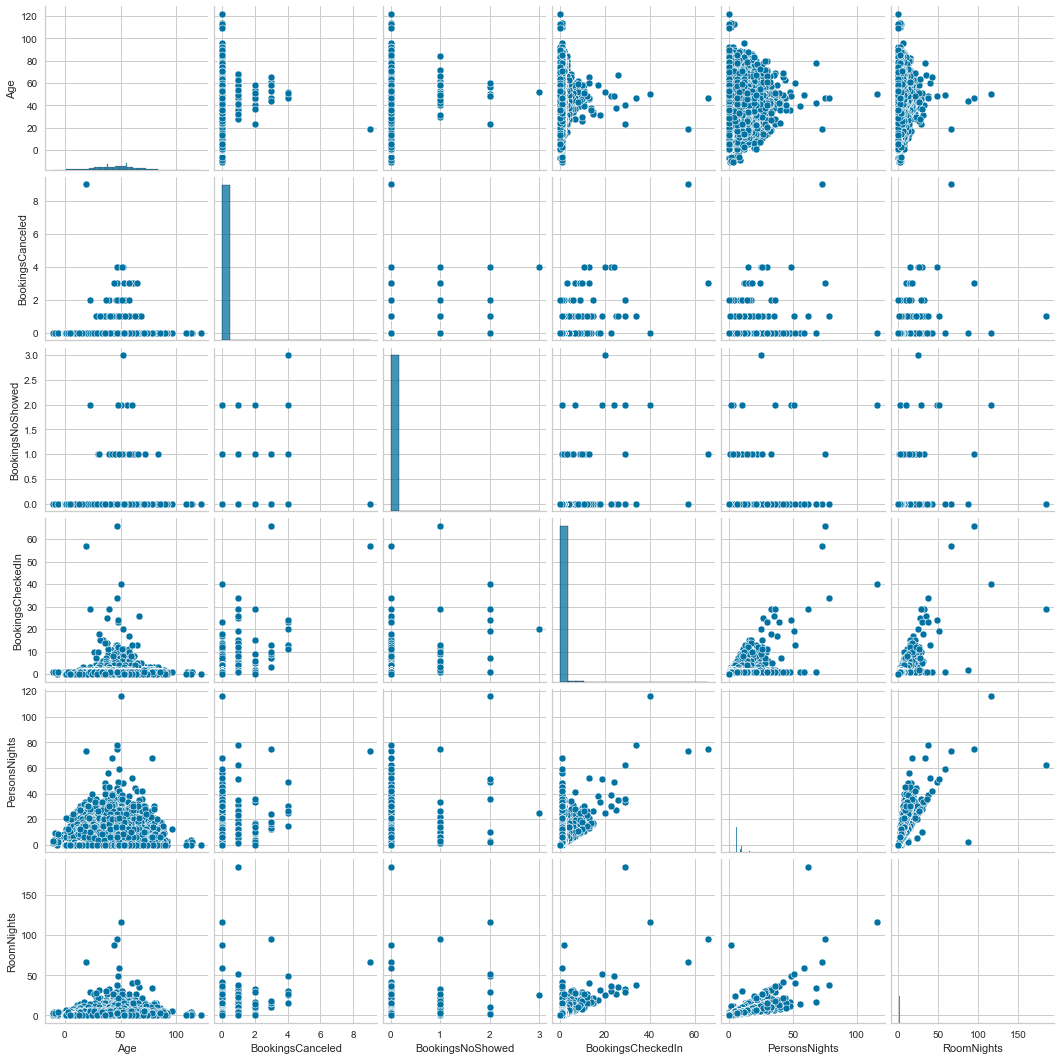

In [ ]:
#Now, Let's check some correlations between some variables related the behaviour in pre and during the stay.
cols=['Age','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
g = sns.pairplot(ds[cols])

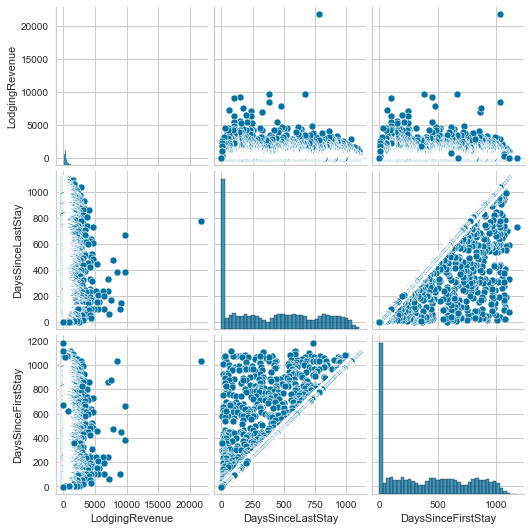

In [ ]:
#Now, Let's check some correlations between some variables related the behaviour in pre and during the stay.
cols=['LodgingRevenue','DaysSinceLastStay','DaysSinceFirstStay']
g = sns.pairplot(ds[cols])

#### Insights from Pair Plot Visualization

- its quite inconclusive the visualization of correlations in the pair plot graph due to number of observations.
- Its possible to spot some outliers in almost all attributes pairs.
- we will need to check the correlation with a better in the correlation matrix

In [ ]:
ds.loc[ds.LodgingRevenue < 0 ].head(100).to_csv('check_extract_minor0.csv', index = False)

<AxesSubplot:>

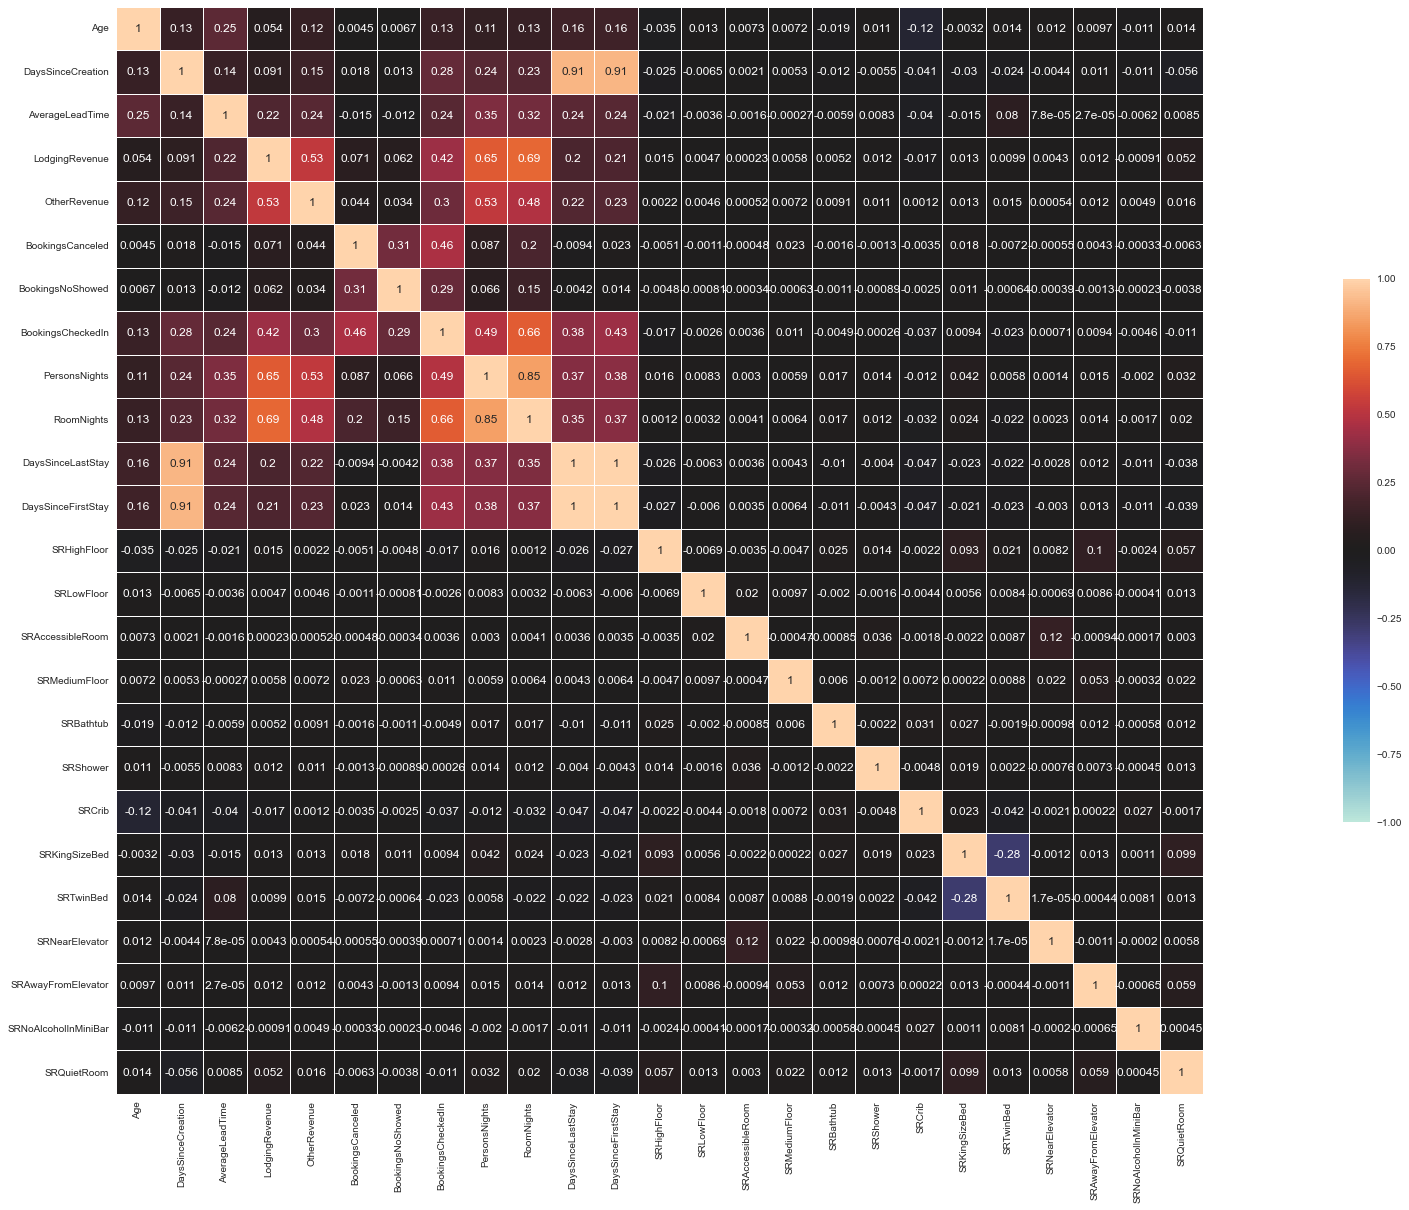

In [ ]:
#Correlations

# Compute the correlation matrix
corr = ds.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



#### Insights from Correlation Matrix
- PersonNights and RoomNights have a significant correlation with Lodging revenue, which is logic since the more amount of nights, people and rooms customer have the more amount they should bill
- RoomNights also has a high positive correlation with PersonNights

### Binary Variables 

In [ ]:
#Select numerical variables, leaving the binaries for later
binary = ds[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]

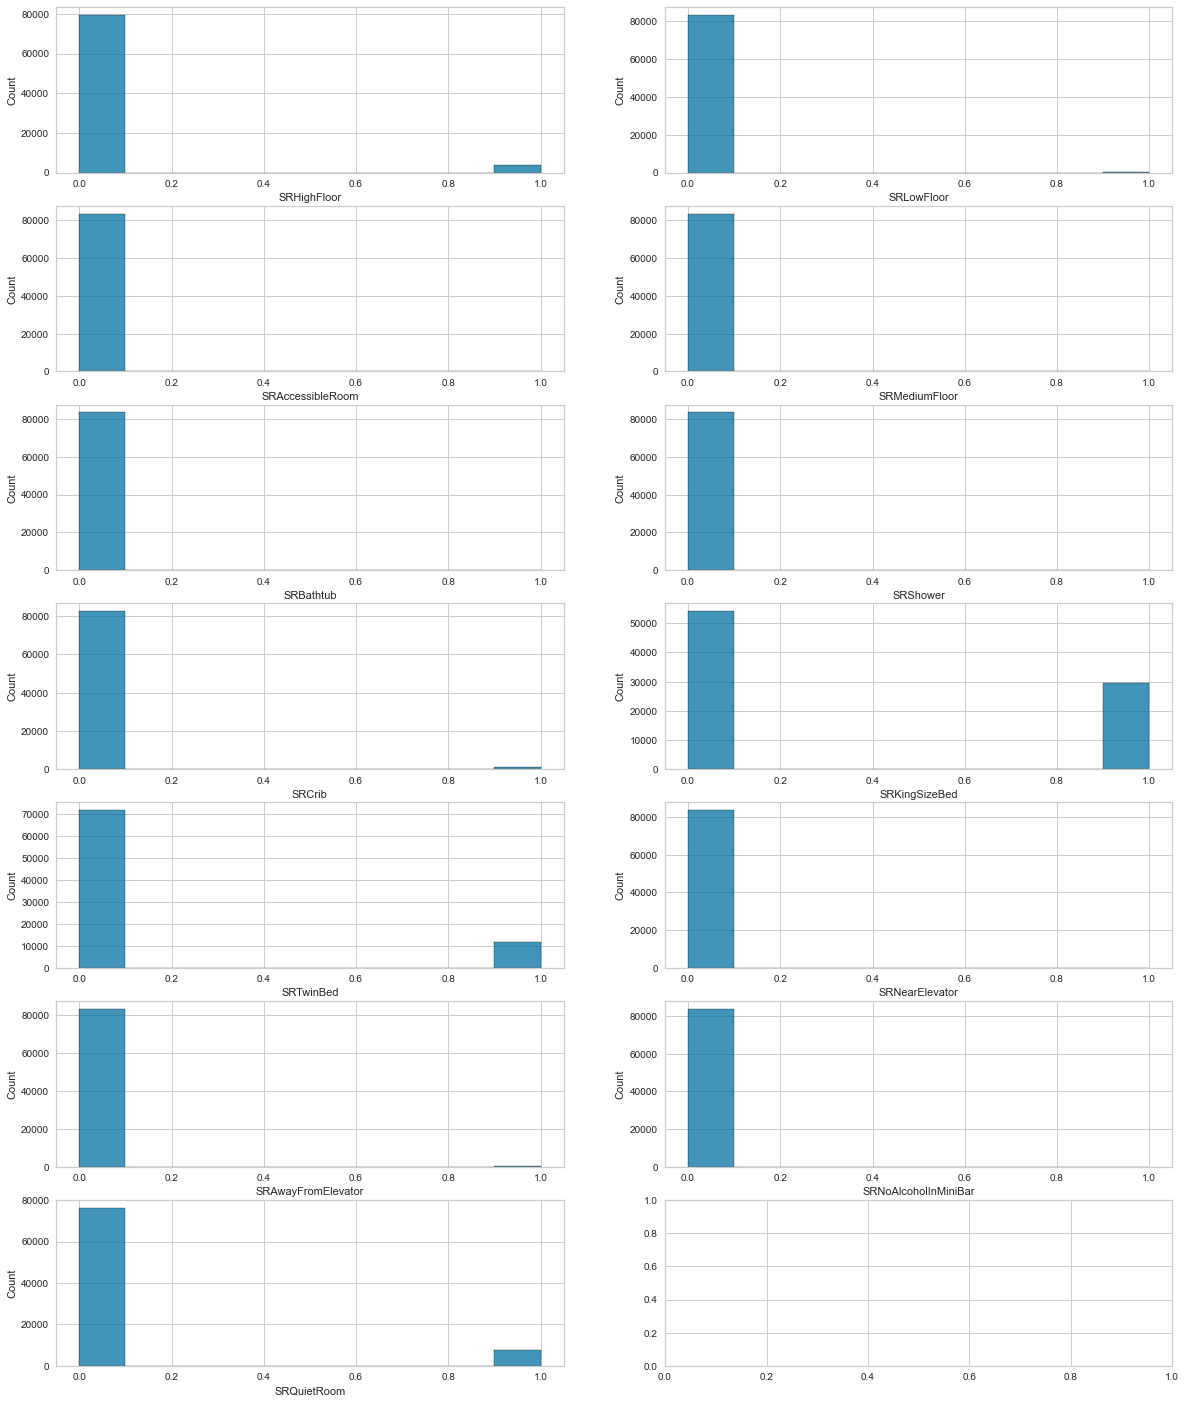

In [ ]:
# visuals of the distribution of the numerical variables
fig, ax = plt.subplots(7,2 , figsize=(20,25))
for var, subplot in zip(binary, ax.flatten()):
    g = sns.histplot(data=ds,
                    bins=10,
                    x=var,
                    ax=subplot,
                    kde=False)

- The behavior is about the same for the whole dataset when we check on this variables
- From all of this variables we should only keep: SRTwinBed and SRKingSizeBed since they are more sparse.

### Suggestions for data preparation:

#### 1) Categorical variables:
- For distributionchannel, only keep travel agent and direct. Group corporate and electronic distribution under "others"
- For MarketSegment, only keep Travel agent/operator, direct and groups (about 33% of the data). Rest of the variables aggregate with "other".
- Would we like to drop market segment, considering that the most frequent class is "other", therefore we won't get any marketing insights? If we only keep distribution channel we will still keep the 2 most relevant insights from these 2 variables: People who book through travel agent + people who book directly.
- Nationality, we might want to keep for example: 75% of the dataset, and group the rest under "Others". Or we could group and bin the countries and for example put: Frequent countries, Less frequent, etc.
- Drop Name Hash and DocID Hash, since they won't be used for segmentation

#### 2) Numeric variables:
- Remove outliers from Lodging revenue, Other revenue, Bookings canceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights. Could be using Tukey method.
- We could aggregate revenue from lodging and from others and keep a total revenue
- Drop BookingsCanceled, BookingsNoShowed, BookingsCheckedIn since the values are about the same for most of the observations
- Since PersonsNight= Nights*People (Children+Adults) & RoomNights=Nights*Room. We could create a new feature= PersonsRoom=PersonsNight/RoomNights to have the amount of people per room. With this variable we could infer what are the rooms most used. Also note these 2 variables have a high correlation

 
#### 3) Zoom Binary variables:
- Drop 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom' since the values are about the same for the whole dataset

#### Other recommendations:

> Indented block


- creation of Sum LodgingRevenue and OtherRevenue = totalRevenue, and dropping LodgingRevenue and OtherRevenue
- Divide TotalRevenue / RoomNights = Avg_Spend_perNight
- Agregate SRs below 1% of importance in SROthers
- Fill missing values for Age with mean - after dropping duplicates of IdHash
- Aggregate Nationality by Domestic and Foreing

# <font color='#BFD72F'>2 - Data Preparation</font> <a class="anchor" id="prep"></a>

In [ ]:
#Starting creating a copy of the datasetb
ds_clean = ds.copy(deep = True)

## <font color='#BFD72F'>2.1 - Data transformation</font> <a class="anchor" id="transformation"></a>

In [ ]:
# drop duplicated for doc hash
ds_clean=ds_clean.drop_duplicates('DocIDHash')

#Treating categorical variables to reduce cardinality
DistributionChannel_convert = {'Electronic Distribution'   :'Other',
                                'Corporate'                :'Other',
                                'Direct'                   :'Direct',
                                'Travel Agent/Operator'    :'Travel Agent/Operator'}

ds_clean['DistributionChannel'] = ds_clean['DistributionChannel'].apply(lambda x : DistributionChannel_convert[x])

#Reducing Cardinality of Nationality feature to 2 categoies: Domestic and Foreing
ds_clean['Nationality'] = np.where(ds_clean['Nationality'].isin(['PRT', 'FRA', 'DEU', 'GBR', 'ESP']), "Top_EU"  , 'Other')

# imputing missing values for age with random imputation
ds_clean['Age'] = ds_clean['Age'].apply(lambda x: np.random.choice(ds_clean['Age'].dropna().values) if pd.isna(x) else x)

# remove customers below 18 becuase they are not actionable customer for profiling

ds_clean = ds_clean.loc[# removal of minors
                        (ds_clean.Age > 18) 
                        #(ds_clean.DaysSinceFirstStay >= 0)
                        ]  

## <font color='#BFD72F'>2.2 - Outliers</font> <a class="anchor" id="outliers"></a>

In [ ]:
# removal of outlier 

def removeOutliers (df, colList, lowPercentile=0.0025, highPercentile=0.9975, verbose=False):
    
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
        
    for name in list(df[colList].columns):
        
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
        
    return df

In [ ]:
# Outliers in numerical (non-binary) attributes

outliers = ['Age','AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'RoomNights', 'BookingsCheckedIn','PersonsNights']
ds_clean = removeOutliers(ds_clean, colList=outliers , lowPercentile=0.0015, highPercentile=0.9985, verbose=True)

print(f'dataset dimensions: --> rows: {ds_clean.shape[0]} , columns: {ds_clean.shape[1]} ')

         Age  AverageLeadTime  LodgingRevenue  OtherRevenue  RoomNights  \
0.0015  19.0              0.0           0.000        0.0000         0.0   
0.9985  86.0            518.0        2937.732      973.0769        14.0   

        BookingsCheckedIn  PersonsNights  
0.0015                0.0            0.0  
0.9985                4.0           30.0  
dataset dimensions: --> rows: 71765 , columns: 31 


In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,79811.0,45.398028,16.572368,-11.0,34.0,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.0,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.0,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.0,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.0,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.0,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.0,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.0,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.0,4.0,6.000,116.00
RoomNights,83590.0,2.358536,2.281746,0.0,1.0,2.0,4.000,185.00


# <font color='#BFD72F'>3 - Feature selection + engineering</font> <a class="anchor" id="features"></a>

In [ ]:

ds_clean["TotalRevenue"] = (
    ds_clean["LodgingRevenue"] + 
    ds_clean["OtherRevenue"]
)

ds_clean["PersonsRoom"] = (
    ds_clean["PersonsNights"] / 
    ds_clean["RoomNights"]
)
ds_clean["PersonsRoom"] = ds_clean["PersonsRoom"].apply(lambda x : 0 if (x == np.inf or x ==  -np.inf) else x)

ds_clean['Avg_price_PR'] = (
    ds_clean['TotalRevenue'] / 
    ds_clean['PersonsRoom']
)
ds_clean['Avg_price_PR'] = ds_clean["Avg_price_PR"].apply(lambda x : 0 if (x == np.inf or x ==  -np.inf) else x)

ds_clean['Activity_time'] = (
    ds_clean['DaysSinceFirstStay'] 
    - ds_clean['DaysSinceLastStay']
)

# Encode categorical variables to dummy variables

cols = ['DistributionChannel', 'Nationality']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
ds_clean = ce_one_hot.fit_transform(ds_clean)

# log for skewed values 
ds_clean['AverageLeadTime'] = ds_clean['AverageLeadTime'].apply(lambda x: np.log(x+1))
ds_clean['LodgingRevenue']  = ds_clean['LodgingRevenue'].apply(lambda x: np.log(x+1))
ds_clean['PersonsNights']   = ds_clean['PersonsNights'].apply(lambda x: np.log(x+1))
ds_clean['RoomNights']      = ds_clean['RoomNights'].apply(lambda x: np.log(x+1))

# fill eventual nans in the lambda functions
ds_clean = ds_clean.fillna(0)
 

In [ ]:
#ds_clean[ds_clean.isin([np.inf, -np.inf])]
ds_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Nationality_Top_EU,71765.0,0.553975,0.497082,0.0,0.000000,1.000000,1.000000,1.000000
Nationality_Other,71765.0,0.446025,0.497082,0.0,0.000000,0.000000,1.000000,1.000000
Age,71765.0,47.468292,14.503271,19.0,36.000000,48.000000,58.000000,86.000000
DaysSinceCreation,71765.0,461.113245,311.280437,0.0,187.000000,421.000000,728.000000,1095.000000
AverageLeadTime,71765.0,2.994158,2.012346,0.0,0.693147,3.610918,4.700480,6.251904
LodgingRevenue,71765.0,4.505438,2.418244,0.0,4.543295,5.521461,6.030685,7.981392
OtherRevenue,71765.0,67.871911,91.218094,0.0,7.000000,42.000000,91.000000,958.800000
BookingsCanceled,71765.0,0.000599,0.027677,0.0,0.000000,0.000000,0.000000,3.000000
BookingsNoShowed,71765.0,0.000195,0.015836,0.0,0.000000,0.000000,0.000000,2.000000
BookingsCheckedIn,71765.0,0.807399,0.438388,0.0,1.000000,1.000000,1.000000,4.000000


#### Features to drop
- ID - irrelevant to clustering
- NameHash (after droping duplicates) - irrelevant to clustering
- DocIDHash (after droping duplicates) - irrelevant to clustering
- MarketSegment (sparse - top 3 only 33% of total)
- SRHighFloor - sames data to most obsersavtions of the dataset
- SRLowFloor - sames data to most obsersavtions of the dataset
- SRAccessibleRoom - sames data to most obsersavtions of the dataset
- SRMediumFloor - sames data to most obsersavtions of the dataset
- SRBathtub - sames data to most obsersavtions of the dataset
- SRShower - sames data to most obsersavtions of the dataset
- SRCrib - sames data to most obsersavtions of the dataset
- SRNearElevator - sames data to most obsersavtions of the dataset
- SRAwayFromElevator - sames data to most obsersavtions of the dataset
- SRNoAlcoholInMiniBar - sames data to most obsersavtions of the dataset
- SRQuietRoom - sames data to most obsersavtions of the dataset
- LodgingRevenue - high correlation with OtherRevenue - TotalRevenue Feature created
- OtherRevenue - - high correlation with LodgingRevenue - TotalRevenue Feature created
- DistributionChannel - dummy variables created after cardinality reduction
- Nationality - dummy variables created after cardinality reduction

In [ ]:
ds_model = ds_clean.drop(
    columns = ['ID', 
               'NameHash',
               'DocIDHash', 
               'MarketSegment',
               'SRHighFloor', 
               'SRLowFloor', 
               'SRAccessibleRoom',
               'SRMediumFloor', 
               'SRBathtub', 
               'SRShower',
               'SRCrib',
               'SRNearElevator',
               'SRAwayFromElevator', 
               'DaysSinceLastStay',
               'RoomNights',
               'SRNoAlcoholInMiniBar', 
               'SRQuietRoom',
               'LodgingRevenue',
               'OtherRevenue',
               'DaysSinceCreation',
               #'DistributionChannel',
               'Nationality_Other',
               'DistributionChannel_Direct',
               'BookingsNoShowed',
               'PersonsRoom'

              ])

In [ ]:
# creating a dataset that will be used to look at the variables significance for each cluster laster after clustering
ds_clean_before_norm = ds_model.copy(deep = True)
ds_clean_before_norm.head()

,Nationality_Top_EU,Age,AverageLeadTime,BookingsCanceled,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,DistributionChannel_Other,DistributionChannel_Travel Agent/Operator,SRKingSizeBed,SRTwinBed,TotalRevenue,Avg_price_PR,Activity_time
0,1,51.0,3.828641,1,3,2.197225,1074,1,0,0,0,476.3,297.6875,923
1,1,47.0,4.127134,0,1,2.397895,1100,0,1,0,0,333.0,166.5000,0
2,1,31.0,0.000000,0,0,0.000000,-1,0,1,0,0,0.0,0.0000,0
3,1,60.0,4.543295,0,1,2.397895,1100,0,1,0,0,300.0,150.0000,0
4,1,51.0,0.000000,0,0,0.000000,-1,0,1,0,0,0.0,0.0000,0


In [ ]:
# Scaling between - 1 and 1 all the numeric variables 

minmax = preprocessing.MinMaxScaler(feature_range = (-1,1))
ds_model = pd.DataFrame(minmax.fit_transform(ds_model.values), columns=ds_model.columns,index=ds_model.index)
ds_model = ds_model.dropna()

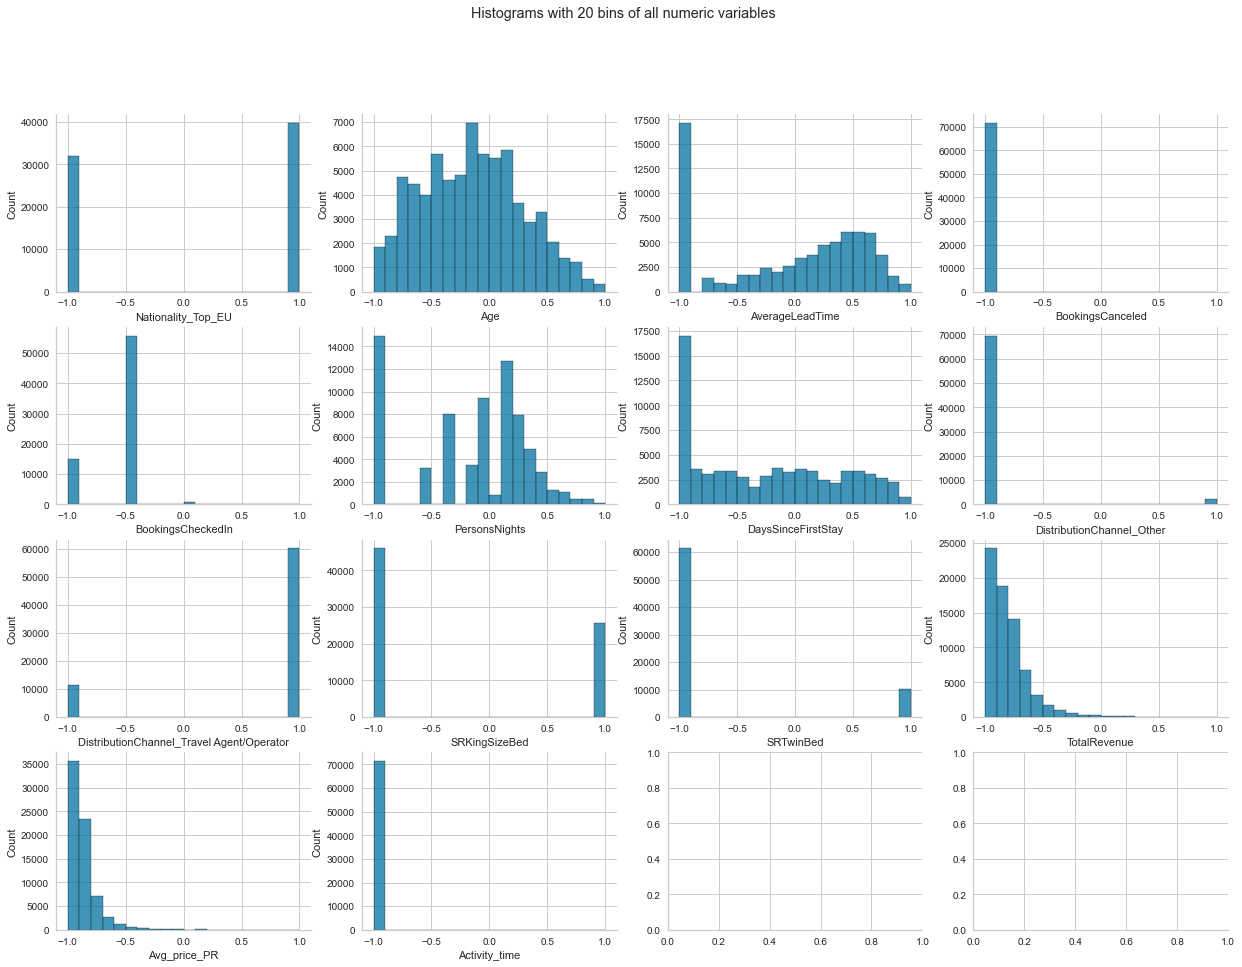

In [ ]:
# Draw
fig, ax = plt.subplots(4, 4, figsize=(21,15))
for var, subplot in zip(ds_model, ax.flatten()):
    g = sns.histplot(data=ds_model,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Histograms with 20 bins of all numeric variables");

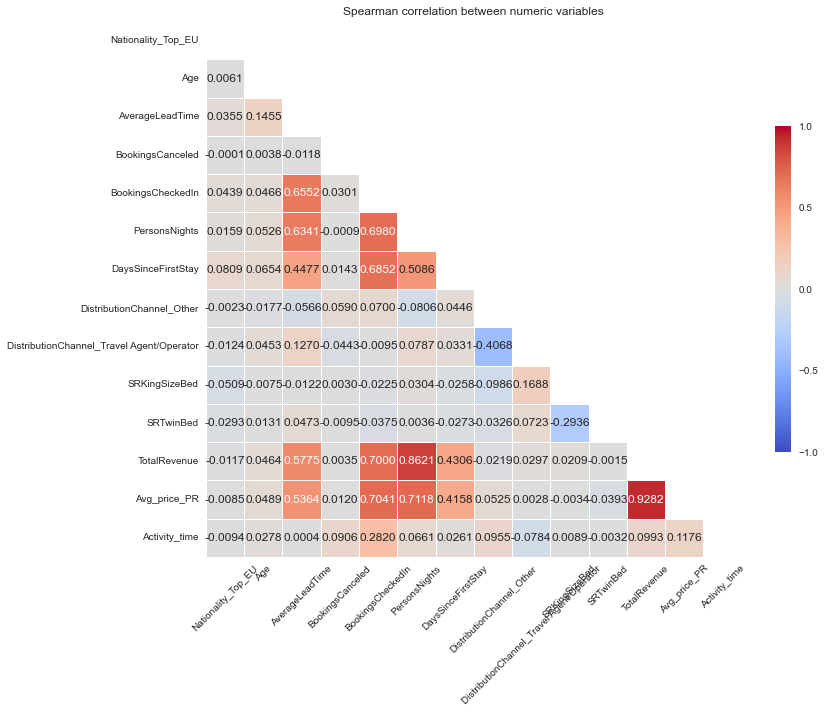

In [ ]:
def correlation_heatmap(ds, method ):
    numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
    corr = ds[numerical].corr(method=method)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)]= True

    # Draw
    fig , ax = plt.subplots(figsize=(12, 15))
    heatmap = sns.heatmap(corr,
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                        fmt='.4f',
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        )

    # Decoration
    plt.title("Spearman correlation between numeric variables")
    ax.set_yticklabels(corr.columns, rotation = 0)
    ax.set_xticklabels(corr.columns, rotation = 45)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


correlation_heatmap(ds_model, 'spearman')

# <font color='#BFD72F'>4. - Clustering </font> <a class="anchor" id="models"></a>

In [ ]:
ds_non_PCA = ds_clean.drop(
    columns = ['ID', 
               'NameHash',
               'DocIDHash', 
               'MarketSegment',
               'SRHighFloor', 
               'SRLowFloor', 
               'SRAccessibleRoom',
               'SRMediumFloor', 
               'SRBathtub', 
               'SRShower',
               'SRCrib',
               'SRNearElevator',
               'SRAwayFromElevator', 
               'DaysSinceLastStay',
               'RoomNights',
               'SRNoAlcoholInMiniBar', 
               'SRQuietRoom',
               'LodgingRevenue',
               'OtherRevenue',
               'DaysSinceCreation',
               #'DistributionChannel',
               'Nationality_Other',
               'DistributionChannel_Direct',
               'BookingsNoShowed',
               'PersonsRoom'

              ])

ds_non_PCA = pd.DataFrame(minmax.fit_transform(ds_non_PCA.values), columns=ds_non_PCA.columns,index=ds_non_PCA.index)
ds_non_PCA = ds_model.dropna()

ds_non_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
Nationality_Top_EU,71765.0,0.107950,0.994163,-1.0,-1.000000,1.000000,1.000000,1.0
Age,71765.0,-0.150200,0.432933,-1.0,-0.492537,-0.134328,0.164179,1.0
AverageLeadTime,71765.0,-0.042161,0.643755,-1.0,-0.778260,0.155142,0.503696,1.0
BookingsCanceled,71765.0,-0.999601,0.018452,-1.0,-1.000000,-1.000000,-1.000000,1.0
BookingsCheckedIn,71765.0,-0.596300,0.219194,-1.0,-0.500000,-0.500000,-0.500000,1.0
PersonsNights,71765.0,-0.161700,0.517770,-1.0,-0.596302,-0.062642,0.279693,1.0
DaysSinceFirstStay,71765.0,-0.244196,0.620767,-1.0,-0.869683,-0.257919,0.285068,1.0
DistributionChannel_Other,71765.0,-0.938466,0.345375,-1.0,-1.000000,-1.000000,-1.000000,1.0
DistributionChannel_Travel Agent/Operator,71765.0,0.678088,0.734986,-1.0,1.000000,1.000000,1.000000,1.0
SRKingSizeBed,71765.0,-0.282547,0.959260,-1.0,-1.000000,-1.000000,1.000000,1.0


## <font color='#BFD72F'>4.2 - Kmeans without PCA</font> <a class="anchor" id="models"></a>

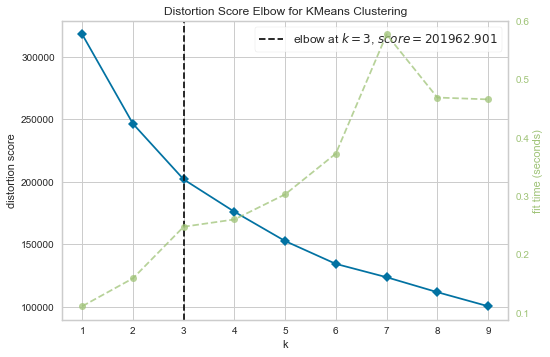

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Apply the Elbow method to select K
km = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=123)

visualizer = KElbowVisualizer(km, k=(1,10), random_state=123)
visualizer.fit(ds_non_PCA)
visualizer.show() 

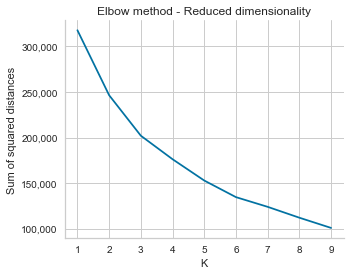

In [ ]:
# Select K based on the sum of squared distances - Elbow method
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123)
    km = km.fit(ds_non_PCA)
    ssd.append(km.inertia_)
    
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(K, ssd, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Elbow method - Reduced dimensionality');

The Elbow method suggests that K=3 is the best choice for the number of clusters based on the sum of squared distance between data points and their assigned clusters’ centroids. However, let's look at the Silhouette method to reasses the best number of k.

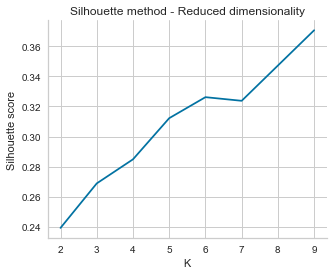

In [ ]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

for k in range(2, 10):
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123).fit(ds_non_PCA)
  labels = km.labels_
  sil.append(silhouette_score(ds_non_PCA, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 10), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality');

The Silhouette method indicates that the best value for k is 9, followed by 7. However, considering the value given by the Elbow method, and that having too many clusters would be detrimental for the business objectives , the k=5 was chosen, which has only a slighgtly smaller silhouette score compared to k=7, and is optimal for the business understanding of the clusters for the marketing objectives.

In [ ]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=123)
allDistances = kmeans.fit_transform(ds_non_PCA)
y_kmeans = kmeans.predict(ds_non_PCA)

/Users/julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



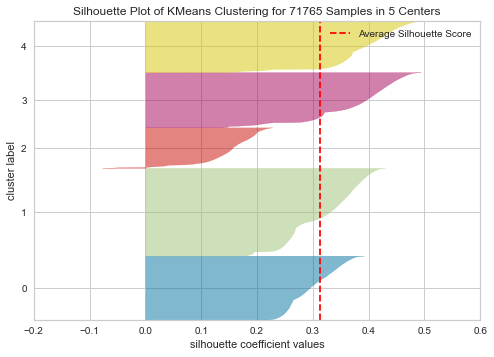

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71765 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize Silhouette 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(ds_non_PCA)
visualizer.show()


Analysing the Silhouette Plot we can see that the average silhouette score is pretty low, just above 0.3. That is due to cluster 2, which also appears to be smaller than others, which also has lower silhouette coefficient values compared to other clusters. 

In [ ]:
# Plot clusters cardinality 

def cluster_cardinality(ds,y_kmeans):
    # to be applied to before normalization dataset
    # Count observations per cluster
    freqByCluster = ds.groupby(y_kmeans).size()

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.countplot(x=y_kmeans, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(freqByCluster):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data}" )
    sns.despine()
    plt.title("Cluster cardinality")
    plt.xlabel("Cluster")
    plt.ylabel("Frequency in cluster")
    plt.rc('axes')

In [ ]:
# Plot clusters magnitude
def cluster_magnitude(allDistances, ds2, y_kmeans):
    # Compute Magnitude
    ds2['distanceToCentroid'] = np.min(allDistances,axis=1)
    magnitude = ds2['distanceToCentroid'].groupby(y_kmeans).sum()
    X = ds2.drop(columns=['distanceToCentroid'])

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(magnitude):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" )
    sns.despine()
    plt.title("Cluster magnitude")
    plt.xlabel("Cluster")
    plt.ylabel("Sum of distances to centroid")
    plt.rc('axes')

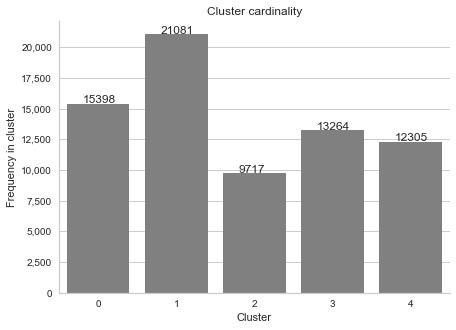

In [ ]:
cluster_cardinality(ds_clean_before_norm,y_kmeans)

As we can observe from the cluster cardinality chart, the cluster with the most frequent cluster is cluster 1, and the least cluster 2 which is less than half of the size of the largest cluster. The rest of the clusters have more evenly distributed frequency. 

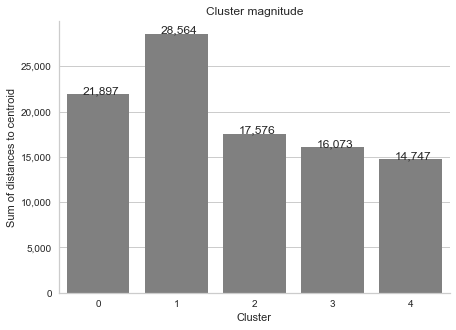

In [ ]:
cluster_magnitude(allDistances, ds_clean_before_norm, y_kmeans)

Looking at the cluster magnitude we can observe that cluster 1, which is also the largest cluster has the greatest sum of dictances to the centroid, meaning that the objects in the cluster are much more spread apart when compared to the other clusters. The most dense cluster is cluster 4.

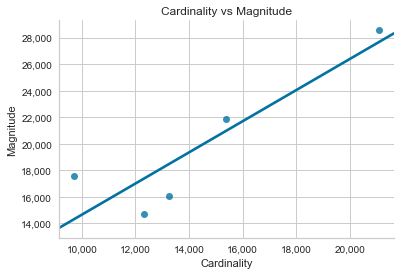

In [ ]:
# Plot cardinality vs magnitude

# Draw
freqByCluster = ds_clean_before_norm.groupby(y_kmeans).size()
magnitude = ds_clean_before_norm['distanceToCentroid'].groupby(y_kmeans).sum()

fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude")
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes')

Looking at the Cardinality vs Magnitude graph, we can observe that there are 2 anomalous clusters: cluster 3 and cluster 4, as the cardinality does not correlate with magnitude for them as compared to the other clusters.

/Users/julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



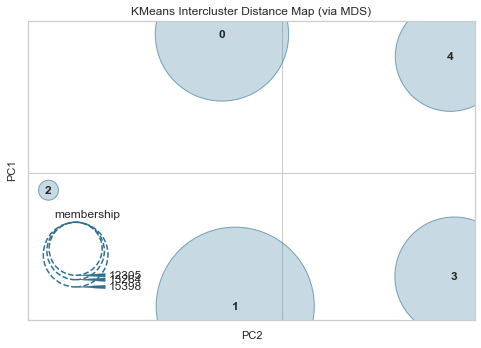

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(ds_non_PCA)
visualizer.show()


Even at two dimensions we can observe that aalthough cluster 2 is much smaller when compared to the others, it is very distant from the others.The distance between the other clusters in maintained, and they are not overlapping between each other.

In [ ]:
# 
#top_features = ds_model.index
clustersMeanDF = pd.DataFrame(ds_non_PCA.groupby(y_kmeans).mean())
clustersMeanDF.transpose()

,0,1,2,3,4
Nationality_Top_EU,-1.000000,1.000000,0.113718,1.000000,-1.000000
Age,-0.152096,-0.121328,-0.194122,-0.165971,-0.145609
AverageLeadTime,-0.034581,0.043587,-0.227099,-0.034352,-0.060927
BookingsCanceled,-1.000000,-0.999937,-0.998216,-0.999648,-0.999567
BookingsCheckedIn,-0.606345,-0.587045,-0.581661,-0.595258,-0.612271
PersonsNights,-0.167090,-0.134872,-0.245721,-0.133999,-0.164428
DaysSinceFirstStay,-0.282382,-0.176580,-0.273899,-0.217699,-0.317359
DistributionChannel_Other,-1.000000,-1.000000,-0.551919,-0.999548,-0.995449
DistributionChannel_Travel Agent/Operator,1.000000,1.000000,-1.000000,0.826598,0.888826
SRKingSizeBed,-1.000000,-1.000000,-0.963981,1.000000,1.000000


### Clusters results interpretation

In [ ]:
ds_non_PCA['cluster'] = pd.Series(y_kmeans, index=ds_non_PCA.index)
# get the original data set
full_db = ds_clean_before_norm.merge(ds_non_PCA['cluster'], how = 'inner', left_index= True, right_index = True)
full_db.columns
full_db.groupby(by = 'cluster').mean().T

cluster,0,1,2,3,4
Nationality_Top_EU,0.000000,1.000000,0.556859,1.000000,0.000000
Age,47.404793,48.435511,45.996913,46.939988,47.622105
AverageLeadTime,3.017852,3.262204,2.416051,3.018568,2.935498
BookingsCanceled,0.000000,0.000095,0.002676,0.000528,0.000650
BookingsCheckedIn,0.787310,0.825910,0.836678,0.809484,0.775457
PersonsNights,1.430101,1.485420,1.295092,1.486918,1.434671
DaysSinceFirstStay,395.483894,453.939472,400.170938,431.221049,376.159204
DistributionChannel_Other,0.000000,0.000000,0.224040,0.000226,0.002275
DistributionChannel_Travel Agent/Operator,1.000000,1.000000,0.000000,0.913299,0.944413
SRKingSizeBed,0.000000,0.000000,0.018010,1.000000,1.000000


#### Some insights:

**Cluster 0**: Not from top EU country, never cancel, book with agent
* Not from the Top EU country
* Do not Cancel bookings
* 79% Check in for their bookings
* They book in with a travel agent or operator
* Most recent customers
* Family members or friends when travel accompanied, 28% request for twin bed

**Cluster 1**: From top EU country, book in advance, most common
* The biggest cluster
* From the Top EU country
* Book more in advance
* 83% check in for the bookings
* Some travel accompanied, however they travel with family members or couples, 23% ask for twin bed
* Bring the lowest total revenue per customer
* Book in with a travel agent or operator

**Cluster 2**: Last minute bookings, most likely to show up for the reservation, book directly, more likerly to travel solo
* The smallest cluster
* Mixed nationality
* Book less in advance
* 84% check in, which is the most compared to others
* Pay the highest average price per room
* Do not book from travel agent or operator
* 22% come from other distribution channel
* Most book directly
* More likely to travel solo
* 10% request twin bed, meaning when travel accompanied it is not with a romantic partner
* Least likely to spend on other expenses

**Cluster 3**: From the top EU country, king size bed, travel solo or with a romantic partner
* From the Top EU country
* 81% check in for their booking
* 91% book with an agent or operator
* They prefer king size bed
* When traveling acompanied, they travel with a partner
* Pay the lowest price per room on average

**Cluster 4**: Not from top EU country, more likely to not show up without canceling
* Not from the Top EU country
* 78% of booking check in
* Do not cancel reservations, no show
* 94% book in with a travel agent/operator
* Bring the greatest Total revenue per customer
* Most likely to spend on other expenses
* Prefer king size bed
* When traveling acompanied, they travel with a partner



**Other insights**:
* it seems like age does not pay a big role on separating the customers into clusters the min average value in all clusters is ~ 46 years old (for cluster 4) and the max is ~ 48 years old (cluster 1)
* most of the customers on average stayed for the first time in the hotel over a year ago, and that is observed for all of the clusters

## <font color='#BFD72F'>4.2.1 - PCA</font> <a class="anchor" id="models"></a>

## <font color='#BFD72F'>4.3 - Kmeans with PCA</font> <a class="anchor" id="models"></a>

In [ ]:
# SVD to treat the sparse matrix

pca2 = TruncatedSVD(n_components = 5)
pca2.fit(ds_non_PCA)
X_pca2 = pca2.transform(ds_non_PCA)
print(X_pca2.shape)

(71765, 5)


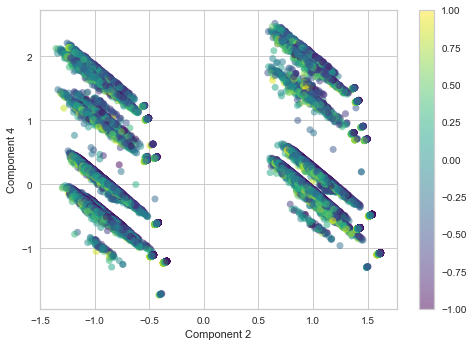

In [ ]:

component1 = 2
component2 = 4
# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, component1], X_pca2[:, component2], c=ds_non_PCA.Age, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component ' + str(component1))
plt.ylabel('Component ' + str(component2))
plt.colorbar();
# what about the LDA?

In [ ]:
# fit PCA to dataset 
pca_trunc = TruncatedSVD(n_components= len(ds_non_PCA.columns)-1).fit(ds_non_PCA)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca_trunc.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(ds_non_PCA.columns)),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca_trunc.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.171136,0.171136
1,2,0.287977,0.459113
2,3,0.156275,0.615389
3,4,0.125250,0.740639
4,5,0.090986,0.831625
5,6,0.063784,0.895409
6,7,0.036142,0.931550
7,8,0.029015,0.960565
8,9,0.014857,0.975422
9,10,0.012111,0.987533


Text(0, 0.5, 'Variance explained')

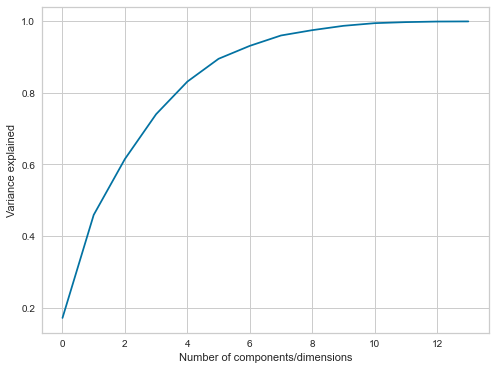

In [ ]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(8, 6))
plt.plot(np.cumsum(pca_trunc.explained_variance_ratio_))

# Decoration

plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')

# 8 components seems to be more than enough

In [ ]:
pca_reduced = TruncatedSVD(n_components=9)
pca_reduced.fit(ds_non_PCA)

X_pca_reduced = pca_reduced.transform(ds_non_PCA)
print(X_pca_reduced.shape)

(71765, 9)


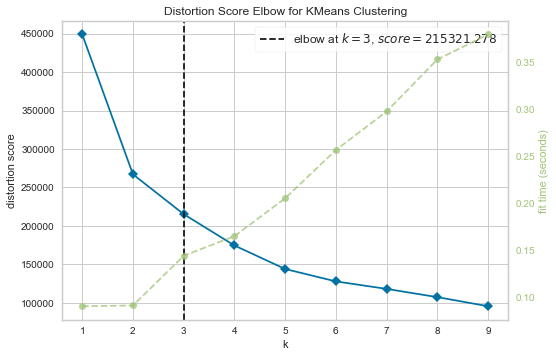

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Apply the Elbow method to select K
km = KMeans(init='k-means++', n_init=10, max_iter=300, random_state=123)

visualizer = KElbowVisualizer(km, k=(1,10), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show() 

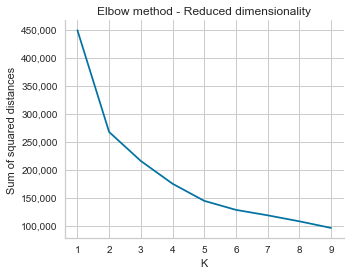

In [ ]:
# Select K based on the sum of squared distances - Elbow method
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(K, ssd, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Elbow method - Reduced dimensionality');

The Elbow method suggests that K=3 is the best choice for the number of clusters based on the sum of squared distance between data points and their assigned clusters’ centroids. However, let's also look at the Silhouette method.

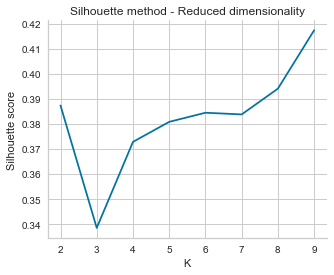

In [ ]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

for k in range(2, 10):
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=123).fit(X_pca_reduced)
  labels = km.labels_
  sil.append(silhouette_score(X_pca_reduced, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 10), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality');

The Silhouette method indicates that the best value for k is 9, followed by 8 and k=6 and =7 have the same silhouette score. However, considering the value given by the Elbow method, and that having too many clusters would be detrimental for the business objectives , the k=5 was chosen, which has only a slighgtly smaller silhouette score compared to k=9, and is optimal for the business understanding of the clusters for the marketing objectives.

In [ ]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=300, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

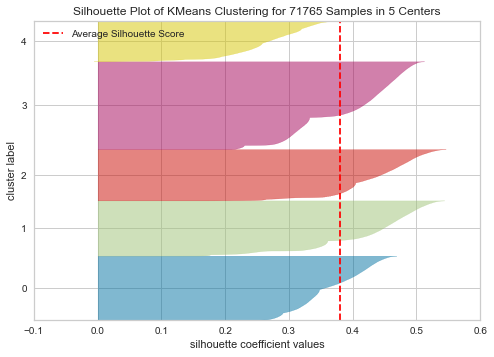

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 71765 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize Silhouette 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()


Analysing the Silhouette Plot we can see that the average silhouette score is pretty low, just below 0.4. That is due to cluster 4, which also appears to be smaller than others, which also has lower silhouette coefficient values compared to other clusters. Cluster 3 appears to be the largest cluster. The average silhouette score is higher than in non pca clustering though.

In [ ]:
# Plot clusters cardinality 

def cluster_cardinality(ds,y_kmeans):
    # to be applied to before normalization dataset
    # Count observations per cluster
    freqByCluster = ds.groupby(y_kmeans).size()

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.countplot(x=y_kmeans, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(freqByCluster):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data}" )
    sns.despine()
    plt.title("Cluster cardinality")
    plt.xlabel("Cluster")
    plt.ylabel("Frequency in cluster")
    plt.rc('axes')

In [ ]:
# Plot clusters magnitude
def cluster_magnitude(allDistances, ds2, y_kmeans):
    # Compute Magnitude
    ds2['distanceToCentroid'] = np.min(allDistances,axis=1)
    magnitude = ds2['distanceToCentroid'].groupby(y_kmeans).sum()
    X = ds2.drop(columns=['distanceToCentroid'])

    # Draw
    fig, ax = plt.subplots(figsize=(7,5))
    g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

    # Decoration
    fmt = "{x:,.0f}"
    tick = ticker.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    for index,data in enumerate(magnitude):
        plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" )
    sns.despine()
    plt.title("Cluster magnitude")
    plt.xlabel("Cluster")
    plt.ylabel("Sum of distances to centroid")
    plt.rc('axes')

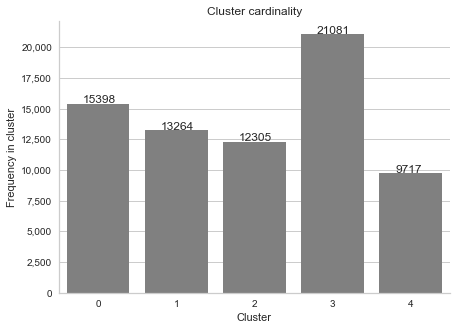

In [ ]:
cluster_cardinality(ds_clean_before_norm,y_kmeans)

As we can observe from the cluster cardinality chart, the cluster with the largest cluster is cluster 3, and the smallest is cluster 4 which is less than half of the size of the largest cluster. The rest of the clusters have more evenly distributed frequency. 

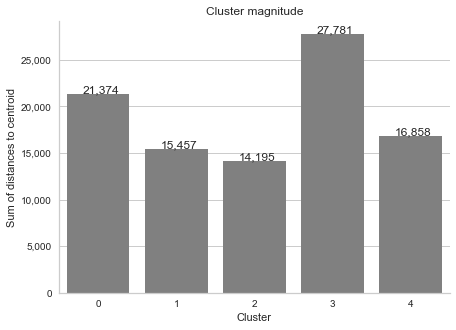

In [ ]:
cluster_magnitude(allDistances, ds_clean_before_norm, y_kmeans)

Looking at the cluster magnitude we can observe that cluster 3, which is also the largest cluster has the greatest sum of dictances to the centroid, meaning that the objects in the cluster are much more spread apart when compared to the other clusters. The most dense cluster is cluster 2.

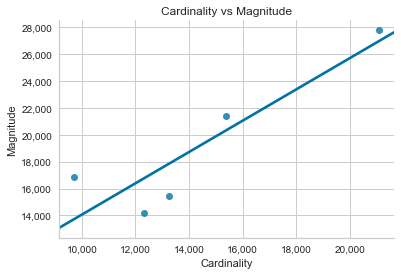

In [ ]:
# Plot cardinality vs magnitude

# Draw
freqByCluster = ds_clean_before_norm.groupby(y_kmeans).size()
magnitude = ds_clean_before_norm['distanceToCentroid'].groupby(y_kmeans).sum()

fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude")
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes')

Looking at the Cardinality vs Magnitude graph, we can observe that there are 2 anomalous clusters: cluster 1 and cluster 2, as the cardinality does not correlate with magnitude for them as compared to the other clusters.

**Comparison to non PCA clustering**

When looking at the non PCA clustering method, so far the findings are pretty similar, the same cluster patterns observed and the same observations found looking at Magnitude vs Cardinality chart.

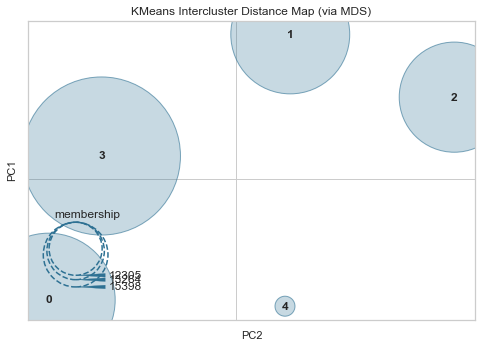

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()


Even at two dimensions we can observe that aalthough cluster 4 is much smaller when compared to the others, it is very distant from the others.The distance between the other clusters in maintained, and they are not overlapping between each other. What is interesting to point out is that there is more distance between the other clusters observed when compared to the non pca dataset.

In [ ]:
#Visualizing the clusters in 3D
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = kmeans.labels_
trace = go.Scatter3d(x=X_pca_reduced[:,0], y=X_pca_reduced[:,1], z=X_pca_reduced[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

When looking at the 3D representation, we can observe that the clusters are distinct clusters

In [ ]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca_reduced.components_,columns=ds_clean_before_norm.columns)
wheightsDF

,Nationality_Top_EU,Age,AverageLeadTime,BookingsCanceled,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,DistributionChannel_Other,DistributionChannel_Travel Agent/Operator,SRKingSizeBed,SRTwinBed,TotalRevenue,Avg_price_PR,Activity_time,distanceToCentroid
0,0.035405,-0.046600,-0.021766,-0.298691,-0.181759,-0.055332,-0.081283,-0.285060,0.206549,0.006030,-0.245163,-0.242767,-0.263144,-0.298241,0.680433
1,-0.069501,0.031502,0.026411,0.213419,0.139532,0.066873,0.070017,0.216947,-0.204544,0.654995,0.000365,0.184558,0.192935,0.214065,0.532970
2,-0.963260,-0.017447,-0.145061,-0.012919,-0.059379,-0.116795,-0.167014,-0.016580,0.026918,0.012911,0.038982,-0.031500,-0.022677,-0.014153,-0.034092
3,0.211471,-0.057530,-0.588052,0.052820,-0.139499,-0.448659,-0.425900,0.131848,-0.414784,-0.051490,0.005002,-0.065198,-0.011858,0.053166,0.043668
4,-0.138842,-0.015228,0.202113,-0.081564,0.056853,0.188591,0.233865,0.101203,-0.742800,-0.397357,-0.301217,-0.011522,-0.034626,-0.078224,0.146384
5,0.006025,0.003764,0.122232,-0.087864,-0.033951,0.054725,-0.004184,-0.054673,-0.189552,-0.143964,0.916404,-0.051614,-0.077959,-0.087547,0.239325
6,-0.036030,-0.091033,-0.473911,-0.009985,-0.026536,-0.197388,0.833914,0.038840,0.062506,0.016035,0.080212,-0.115240,-0.071913,-0.005978,0.007084
7,-0.007656,0.982969,-0.000454,-0.001003,-0.039288,-0.147093,0.060970,0.019313,-0.007461,-0.031684,-0.014106,-0.059303,-0.033571,-0.000634,0.023224
8,-0.008124,-0.098186,0.376550,-0.028880,-0.034944,-0.401075,0.017683,0.753897,0.194161,-0.099579,-0.004407,-0.225189,-0.111021,-0.027566,0.074060


In [ ]:
# Check the mean values of each cluster for top 30 relevant features
comp = abs(wheightsDF)  ## index 14 is component 15
comp


,Nationality_Top_EU,Age,AverageLeadTime,BookingsCanceled,BookingsCheckedIn,PersonsNights,DaysSinceFirstStay,DistributionChannel_Other,DistributionChannel_Travel Agent/Operator,SRKingSizeBed,SRTwinBed,TotalRevenue,Avg_price_PR,Activity_time,distanceToCentroid
0,0.035405,0.046600,0.021766,0.298691,0.181759,0.055332,0.081283,0.285060,0.206549,0.006030,0.245163,0.242767,0.263144,0.298241,0.680433
1,0.069501,0.031502,0.026411,0.213419,0.139532,0.066873,0.070017,0.216947,0.204544,0.654995,0.000365,0.184558,0.192935,0.214065,0.532970
2,0.963260,0.017447,0.145061,0.012919,0.059379,0.116795,0.167014,0.016580,0.026918,0.012911,0.038982,0.031500,0.022677,0.014153,0.034092
3,0.211471,0.057530,0.588052,0.052820,0.139499,0.448659,0.425900,0.131848,0.414784,0.051490,0.005002,0.065198,0.011858,0.053166,0.043668
4,0.138842,0.015228,0.202113,0.081564,0.056853,0.188591,0.233865,0.101203,0.742800,0.397357,0.301217,0.011522,0.034626,0.078224,0.146384
5,0.006025,0.003764,0.122232,0.087864,0.033951,0.054725,0.004184,0.054673,0.189552,0.143964,0.916404,0.051614,0.077959,0.087547,0.239325
6,0.036030,0.091033,0.473911,0.009985,0.026536,0.197388,0.833914,0.038840,0.062506,0.016035,0.080212,0.115240,0.071913,0.005978,0.007084
7,0.007656,0.982969,0.000454,0.001003,0.039288,0.147093,0.060970,0.019313,0.007461,0.031684,0.014106,0.059303,0.033571,0.000634,0.023224
8,0.008124,0.098186,0.376550,0.028880,0.034944,0.401075,0.017683,0.753897,0.194161,0.099579,0.004407,0.225189,0.111021,0.027566,0.074060


In [ ]:
comp[:16].index
len(y_kmeans)

71765

In [ ]:
# 
#top_features = ds_model.index
clustersMeanDF = pd.DataFrame(ds_clean_before_norm.groupby(y_kmeans).mean())
clustersMeanDF.transpose()

,0,1,2,3,4
Nationality_Top_EU,0.000000,1.000000,0.000000,1.000000,0.556859
Age,47.404793,46.939988,47.622105,48.435511,45.996913
AverageLeadTime,3.017852,3.018568,2.935498,3.262204,2.416051
BookingsCanceled,0.000000,0.000528,0.000650,0.000095,0.002676
BookingsCheckedIn,0.787310,0.809484,0.775457,0.825910,0.836678
PersonsNights,1.430101,1.486918,1.434671,1.485420,1.295092
DaysSinceFirstStay,395.483894,431.221049,376.159204,453.939472,400.170938
DistributionChannel_Other,0.000000,0.000226,0.002275,0.000000,0.224040
DistributionChannel_Travel Agent/Operator,1.000000,0.913299,0.944413,1.000000,0.000000
SRKingSizeBed,0.000000,1.000000,1.000000,0.000000,0.018010


In [ ]:
ds_clean['cluster'] = pd.Series(y_kmeans, index=ds_clean.index)
# get the original data set
full_db = ds_clean_before_norm.merge(ds_clean['cluster'], how = 'inner', left_index= True, right_index = True)
full_db.columns
full_db.groupby(by = 'cluster').mean().T

cluster,0,1,2,3,4
Nationality_Top_EU,0.000000,1.000000,0.000000,1.000000,0.556859
Age,47.404793,46.939988,47.622105,48.435511,45.996913
AverageLeadTime,3.017852,3.018568,2.935498,3.262204,2.416051
BookingsCanceled,0.000000,0.000528,0.000650,0.000095,0.002676
BookingsCheckedIn,0.787310,0.809484,0.775457,0.825910,0.836678
PersonsNights,1.430101,1.486918,1.434671,1.485420,1.295092
DaysSinceFirstStay,395.483894,431.221049,376.159204,453.939472,400.170938
DistributionChannel_Other,0.000000,0.000226,0.002275,0.000000,0.224040
DistributionChannel_Travel Agent/Operator,1.000000,0.913299,0.944413,1.000000,0.000000
SRKingSizeBed,0.000000,1.000000,1.000000,0.000000,0.018010


In [ ]:
print(ds_clean_before_norm.shape, ds_clean.shape)


(71765, 15) (71765, 39)


#### Some insights:

**Cluster 0**: Not from top EU country, never cancel, book with agent
* Not from the Top EU country
* Do not Cancel bookings
* 79% Check in for their bookings
* They book in with a travel agent or operator
* Most recent customers
* Family members or friends when travel accompanied, 29% request for twin bed

**Cluster 1**: From the top EU country, king size bed, travel solo or with a romantic partner
* From the Top EU country
* 81% check in for their booking
* 91% book with an agent or operator
* They prefer king size bed
* When traveling acompanied, they travel with a partner
* Pay the lowest price per room on average


**Cluster 2**: Last minute bookings, most likely to show up for the reservation, book directly, more likerly to travel solo
* The smallest cluster
* Mixed nationality
* Book less in advance
* 84% check in, which is the most compared to others
* Pay the highest average price per room
* Do not book from travel agent or operator
* 22% come from other distribution channel
* Most book directly
* More likely to travel solo
* 10% request twin bed, meaning when travel accompanied it is not with a romantic partner
* Least likely to spend on other expenses

**Cluster 3**: From top EU country, book in advance, most common
* The biggest cluster
* From the Top EU country
* Book more in advance
* 81% check in for the bookings
* Some travel accompanied, however they travel with family members or couples, 23% ask for twin bed
* Bring the lowest total revenue per customer
* Book in with a travel agent or operator

**Cluster 4**: Not from top EU country, more likely to not show up without canceling
* Not from the Top EU country
* 78% of booking check in
* Do not cancel reservations, no show
* 94% book in with a travel agent/operator
* Bring the greatest Total revenue per customer
* Most likely to spend on other expenses
* Prefer king size bed
* When traveling acompanied, they travel with a partner



**Other insights**:
* it seems like age does not pay a big role on separating the customers into clusters the min average value in all clusters is ~ 46 years old (for cluster 4) and the max is ~ 48 years old (cluster 1)
* most of the customers on average stayed for the first time in the hotel over a year ago, and that is observed for all of the clusters